In [9]:
import urllib  
from urllib.request import urlopen  
import json  
  
def getGeoForAddress(address):  
    # address = "上海市中山北一路121号"  
    addressUrl = "http://maps.googleapis.com/maps/api/geocode/json?address=" + address  
    #中文url需要转码才能识别  
    addressUrlQuote = urllib.parse.quote(addressUrl, ':?=/')  
    response = urlopen(addressUrlQuote).read().decode('utf-8')  
    responseJson = json.loads(response)  
    #type of response is string  
    # print(type(response))  
    #type of responseJson is dict  
    # print(type(responseJson))  
    lat = responseJson.get('results')[0]['geometry']['location']['lat']  
    lng = responseJson.get('results')[0]['geometry']['location']['lng']  
    print(address + '的经纬度是: %f, %f'  %(lat, lng))  
    return [lat, lng]  
  
if __name__ == '__main__':  
   getGeoForAddress("200 Cole Road" )  

200 Cole Road的经纬度是: 39.954282, -83.177231


In [8]:
def geocodeB(address):
    base = url = "http://api.map.baidu.com/geocoder?address=" + address + "&output=json&key=f247cdb592eb43ebac6ccd27f796e2d2"
    response = requests.get(base)
    answer = response.json()
    return answer['result']['location']['lng'],answer['result']['location']['lat']['location'].split(",")
   
geocodeB("上海市中山北一路121号")


KeyError: 'result'

In [6]:
import pandas as pd
import numpy as np
from datetime import date
data=pd.read_excel('E:/统计学习/farm/Clean_locations.xlsx', 'LOCATION_DATA', index_col=None, na_values=['NA'])
getGeoForAddress(data['Address'][3])

152 Towles Hill Road的经纬度是: 43.796541, -70.840299


[43.7965412, -70.8402993]

In [10]:
import pandas as pd
import numpy as np
from datetime import date
data=pd.read_excel('E:/统计学习/farm/Clean_locations.xlsx', 'LOCATION_DATA', index_col=None, na_values=['NA'])
for i in range(352):
   data['lat'][i]=getGeoForAddress(data['Address'][i])[0]  
   data['lng'][i]=getGeoForAddress(data['Address'][i])[1]  
for i in range(352):
    getGeoForAddress(data['Address'][i])

IndexError: list index out of range

In [9]:
data

,Town,County,ZIP,FarmID,Address,Producer_name,lat,lng
0,Canton,Oxford,04221,MMC101,212 Canton Point Road,River Valley Farm,44.469954,-70.308727
1,Canton,Oxford,04221,MMC102,55 Canton Point Rd,"Conant Acres, Inc.",NaN,NaN
2,Turner,Androscoggin,04282,MMC107,42 Main Street,"Goodnow Jersey Farm, Inc.",NaN,NaN
3,Cornish,York,04020,MMC111,152 Towles Hill Road,"Highland Farms, Inc.",NaN,NaN
4,Orrington,Penobscot,04474,MMC113,605 Center Drive,"Howard Farms, Inc.",NaN,NaN
5,Dexter,Penobscot,04930,MMC114,538 Upper Garland Road,Johnson Farm,NaN,NaN
6,Lewiston,Androscoggin,04240,MMC116,351 Cotton Road,Suchar Farm,NaN,NaN
7,Livermore,Androscoggin,04253,MMC117,1749 River Road,"Lovewell Farms, Inc.",NaN,NaN
8,Bethel,Oxford,04217,MMC119,384 Walkers Mills Road,Blake Farm,NaN,NaN
9,Richmond,Sagadahoc,04357,MMC120,43 High Street,Noble Farm,NaN,NaN


In [179]:
import urllib  
from urllib.request import urlopen  
import json  
import pandas as pd
import numpy as np
from datetime import date
data=pd.read_excel('E:/统计学习/farm/Clean_locations _copy.xlsx', 'LOCATION_DATA', index_col=None, na_values=['NA'])
for i in range(348):
  addressUrl = "http://maps.googleapis.com/maps/api/geocode/json?address=" + data['Address'][i] 
 
    #中文url需要转码才能识别  
  addressUrlQuote = urllib.parse.quote(addressUrl, ':?=/') 
  
  response = urlopen(addressUrlQuote).read().decode('utf-8')
#   print(response)
  responseJso = json.loads(response)  
  print(responseJso)
#   print( responseJson.get('results')[0]['geometry']['location']['lat'] )
  data['lat'][i]= responseJso.get('results')[0]['geometry']['location']['lat']
  data['lng'][i]= responseJso.get('results')[0]['geometry']['location']['lng'] 

{'results': [{'address_components': [{'long_name': '29', 'short_name': '29', 'types': ['street_number']}, {'long_name': 'Oakland Road', 'short_name': 'Oakland Rd', 'types': ['route']}, {'long_name': 'Old Bridge', 'short_name': 'Old Bridge', 'types': ['neighborhood', 'political']}, {'long_name': 'Old Bridge Township', 'short_name': 'Old Bridge Township', 'types': ['locality', 'political']}, {'long_name': 'Middlesex County', 'short_name': 'Middlesex County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'New Jersey', 'short_name': 'NJ', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '08857', 'short_name': '08857', 'types': ['postal_code']}], 'formatted_address': '29 Oakland Rd, Old Bridge, NJ 08857, USA', 'geometry': {'bounds': {'northeast': {'lat': 40.387501, 'lng': -74.30190069999999}, 'southwest': {'lat': 40.3873061, 'lng': -74.3021291}}, 'location': {'

C:\Users\leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'results': [{'address_components': [{'long_name': '382', 'short_name': '382', 'types': ['street_number']}, {'long_name': 'Golden Ridge Road', 'short_name': 'Golden Ridge Rd', 'types': ['route']}, {'long_name': 'Sherman', 'short_name': 'Sherman', 'types': ['locality', 'political']}, {'long_name': 'Aroostook County', 'short_name': 'Aroostook County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Maine', 'short_name': 'ME', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '04776', 'short_name': '04776', 'types': ['postal_code']}], 'formatted_address': '382 Golden Ridge Rd, Sherman, ME 04776, USA', 'geometry': {'location': {'lat': 45.8968034, 'lng': -68.3720166}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 45.8981523802915, 'lng': -68.37066761970848}, 'southwest': {'lat': 45.8954544197085, 'lng': -68.37336558029149}}}, 'place_id': 'ChIJyb7Y

{'error_message': 'You have exceeded your daily request quota for this API. We recommend registering for a key at the Google Developers Console: https://console.developers.google.com/apis/credentials?project=_', 'results': [], 'status': 'OVER_QUERY_LIMIT'}


IndexError: list index out of range

In [180]:
data.to_excel('E:/统计学习/farm/Clean_locations_lat2.xlsx','sheet1')

In [193]:
data2=pd.read_excel('E:/统计学习/farm/Clean_locations_lat.xlsx', 'sheet1', index_col=None, na_values=['NA'])
data3=pd.read_excel('E:/统计学习/farm/FarmDataDelete.xlsx', 'sheet2', index_col=None, na_values=['NA'])
data4=pd.merge(data3,data2,on=['FarmID'],how='left')
data4

,FarmID,FarmName,Time,Spring,Winter,Fall,AVC,Output,TierPrice,PriceNotier,...,Waldo,York,Exit2,Town,County_y,ZIP,Address,Producer_name,lat,lng
0,MMC101,River Valley Farm,20041201,0,1,0,21.729977,5997.676160,20.816658,20.816658,...,0,0,0,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727
1,MMC101,River Valley Farm,20050101,0,1,0,21.729334,6093.277190,20.669462,19.854842,...,0,0,0,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727
2,MMC101,River Valley Farm,20050201,0,1,0,21.733315,5501.160560,20.583519,20.414007,...,0,0,0,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727
3,MMC101,River Valley Farm,20050301,1,0,0,21.729432,6078.831780,20.508902,19.712674,...,0,0,0,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727
4,MMC101,River Valley Farm,20050401,1,0,0,21.729573,6057.780680,20.445374,19.447159,...,0,0,0,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727
5,MMC101,River Valley Farm,20050501,1,0,0,21.727282,6398.735910,20.455935,19.312809,...,0,0,0,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727
6,MMC101,River Valley Farm,20050601,0,0,0,22.042197,21984.614910,20.541588,20.144707,...,0,0,0,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727
7,MMC101,River Valley Farm,20050701,0,0,0,22.040990,22165.744590,20.415113,20.008723,...,0,0,0,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727
8,MMC101,River Valley Farm,20050801,0,0,0,22.042497,21939.584059,20.290186,19.981319,...,0,0,0,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727
9,MMC101,River Valley Farm,20050901,0,0,1,22.050494,20740.606205,20.014615,19.663071,...,0,0,0,Canton,Oxford,04221,212 Canton Point Road,River Valley Farm,44.469954,-70.308727


In [195]:
data4.to_excel('E:/统计学习/farm/FarmDataDeleteWithLat.xlsx','sheet1')

In [190]:
data_y=data4['Exit']
data_x=data4.drop(['Exit','FarmID','FarmName','Time','County_y','Address','Exit2','AVC','Output', 'RevenueNoSub','Androscoggin', 'Aroostook', 'Cumberland',
       'Franklin', 'Kennebec', 'Knox', 'Lincoln', 'Oxford', 'Penobscot','TierPrice', 'PriceNotier', 'StateSubCWT', 'StateSub','Town', 'Producer_name',
       'RevenueNoSub', 'County_x','ZIP',
       'Piscataquis', 'Sagadahoc', 'Somerset', 'Waldo', 'York', 'Exit2'],axis=1)
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.3, random_state=0)
x_valid

,Spring,Winter,Fall,AVC1,Output1,TierPrice1,PriceNotier1,StateSubCWT1,StateSub1,RevenueNoSub1,...,RevenueNoSub5,AVC6,Output6,TierPrice6,PriceNotier6,StateSubCWT6,StateSub6,RevenueNoSub6,lat,lng
15918,0,0,1,23.281109,2.480767e+04,21.456860,20.137093,1.319767e+00,3.274035e+04,4.995544e+05,...,3.536267e+05,22.929945,1.460880e+04,21.810251,21.265811,5.444396e-01,7.953607e+03,3.106679e+05,NaN,NaN
19727,0,0,0,22.999972,6.749970e+04,22.046611,14.938329,7.108282e+00,4.798069e+05,1.008333e+06,...,9.556212e+05,23.016679,6.493627e+04,22.215977,17.212974,5.003003e+00,3.248763e+05,1.117746e+06,NaN,NaN
37084,1,0,0,42.372119,5.942832e+06,20.562239,20.562239,0.000000e+00,0.000000e+00,1.221979e+08,...,9.876784e+07,39.012741,5.683489e+06,19.072705,17.665040,1.407665e+00,8.000448e+06,1.003991e+08,NaN,NaN
4152,0,1,0,24.020232,3.978880e+04,23.393755,19.494796,3.898959e+00,1.551349e+05,7.756746e+05,...,8.599520e+05,24.018344,4.007447e+04,23.701974,20.533146,3.168828e+00,1.269891e+05,8.228550e+05,NaN,NaN
37727,0,0,1,22.184735,7.203434e+02,19.984458,19.083519,9.009387e-01,6.489852e+02,1.374669e+04,...,1.529299e+04,21.671284,1.474944e+04,20.455935,19.312809,1.143126e+00,1.686047e+04,2.848532e+05,43.444700,-70.785723
18472,0,0,1,21.202544,1.522347e+05,20.014615,19.663071,3.515448e-01,5.351731e+04,2.993402e+06,...,2.707188e+06,20.905529,1.327065e+05,20.445374,19.447159,9.982153e-01,1.324697e+05,2.580765e+06,44.640032,-69.603316
13029,0,1,0,23.704250,2.946358e+05,22.794227,22.794227,7.105427e-15,2.093513e-09,6.715995e+06,...,6.859733e+06,23.528899,3.254468e+05,22.145554,21.324235,8.213186e-01,2.672955e+05,6.939904e+06,46.160020,-68.066704
33225,0,1,0,24.264826,3.112028e+03,23.487718,19.467011,4.020707e+00,1.251255e+04,6.058188e+04,...,6.798673e+04,24.263830,3.260082e+03,23.746279,20.239037,3.507242e+00,1.143390e+04,6.598093e+04,NaN,NaN
30710,0,1,0,22.893332,2.008750e+04,24.745036,24.745036,3.552714e-15,7.136515e-11,4.970660e+05,...,5.624038e+05,22.887180,2.100955e+04,27.480898,27.480898,0.000000e+00,0.000000e+00,5.773613e+05,NaN,NaN
10385,1,0,0,24.671781,6.829084e+04,22.304745,20.623634,1.681111e+00,1.148045e+05,1.408405e+06,...,1.650779e+06,24.648681,7.184228e+04,22.468722,22.246958,2.217640e-01,1.593203e+04,1.598272e+06,44.536749,-69.597583


In [191]:
dataset1 = xgb.DMatrix(x_train,label=y_train)
dataset3 = xgb.DMatrix(x_valid)
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0.1,
	    'min_child_weight':1.1,
	    'max_depth':5,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.01,
	    'tree_method':'exact',
	    'seed':0,
	    'nthread':12
	    }
num_round=2
bst = xgb.train(params, dataset1, num_round)
preds = bst.predict(dataset3)
print('error of ypred=%f' % (np.sum((y_valid > 0.5) != y_valid) / float(len(y_valid))))
print('ROC=%f'%roc_auc_score(y_valid,preds))

error of ypred=0.000000
ROC=0.858586


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001FC6E247CF8>>
Traceback (most recent call last):
  File "C:\Users\leo\Anaconda3\lib\site-packages\xgboost\core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


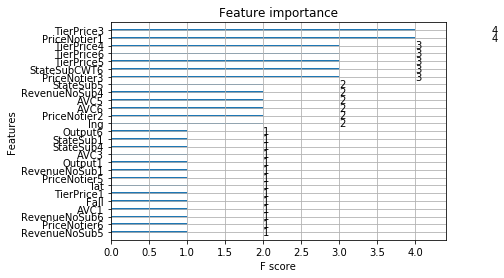

In [192]:
feature_score = bst.get_fscore()
feature_score
feature_score = sorted(feature_score.items(), key=lambda x:x[1],reverse=True)
feature_score
xgb.plot_importance(bst)
plt.show()